In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
os.chdir("./Sales_Data")

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [3]:
df = df.drop_duplicates()

In [4]:
df['Order Date']= pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

df['Month'] = df['Order Date'].dt.month

df = df.dropna(how = 'any')

df['Month'] = df['Month'].astype(int)

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7
3,176560,Google Phone,1,600,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,2019-01-09 16:00:00,"216 Dogwood St, San Francisco, CA 94016",1
11683,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


## Question 1: What was the best month for sale

In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')

df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

df['Price Each'] =pd.to_numeric(df['Price Each'],errors='coerce')

In [6]:
df['Total sale'] = df['Quantity Ordered']*df['Price Each']

In [7]:
best_months_sale = df.groupby('Month').sum()['Total sale'].reset_index()

best_months_sale

,Month,Total sale
0,1,2284818.59
1,2,2393981.89
2,3,2791020.41
3,4,3228561.31
4,5,3031130.14
5,6,2683101.40
6,7,2719467.98
7,8,2442972.91
8,9,2410665.80
9,10,3473646.66


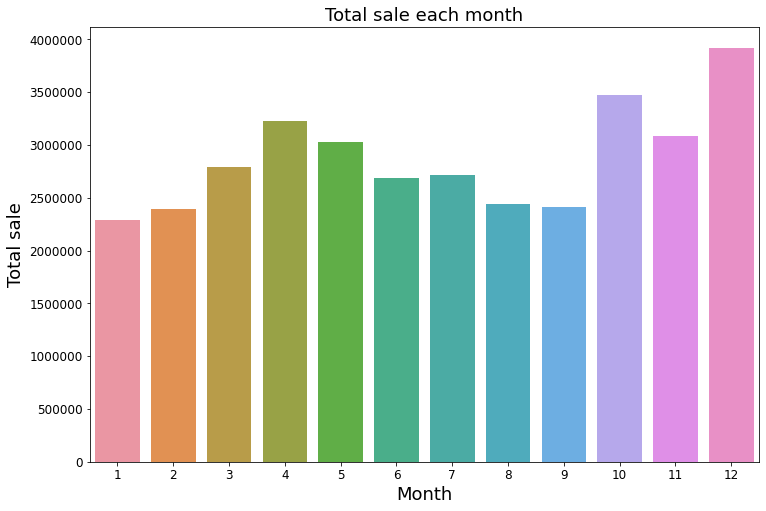

In [8]:
figure(figsize=(12, 8))
plt.title('Total sale each month',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Total sale', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.barplot(x = 'Month', y = 'Total sale', data = best_months_sale)
plt.ticklabel_format(style='plain', axis='y')

## Question 2: What city has highest products sales ?

In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sale,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [10]:
best_city_sale = df.groupby('City').sum()['Total sale'].reset_index()

best_city_sale


,City,Total sale
0,Atlanta (GA),2794199.07
1,Austin (TX),1818044.33
2,Boston (MA),3658627.65
3,Dallas (TX),2765373.96
4,Los Angeles (CA),5448304.28
5,New York City (NY),4661867.14
6,Portland (ME),449321.38
7,Portland (OR),1870010.56
8,San Francisco (CA),8254743.55
9,Seattle (WA),2745046.02


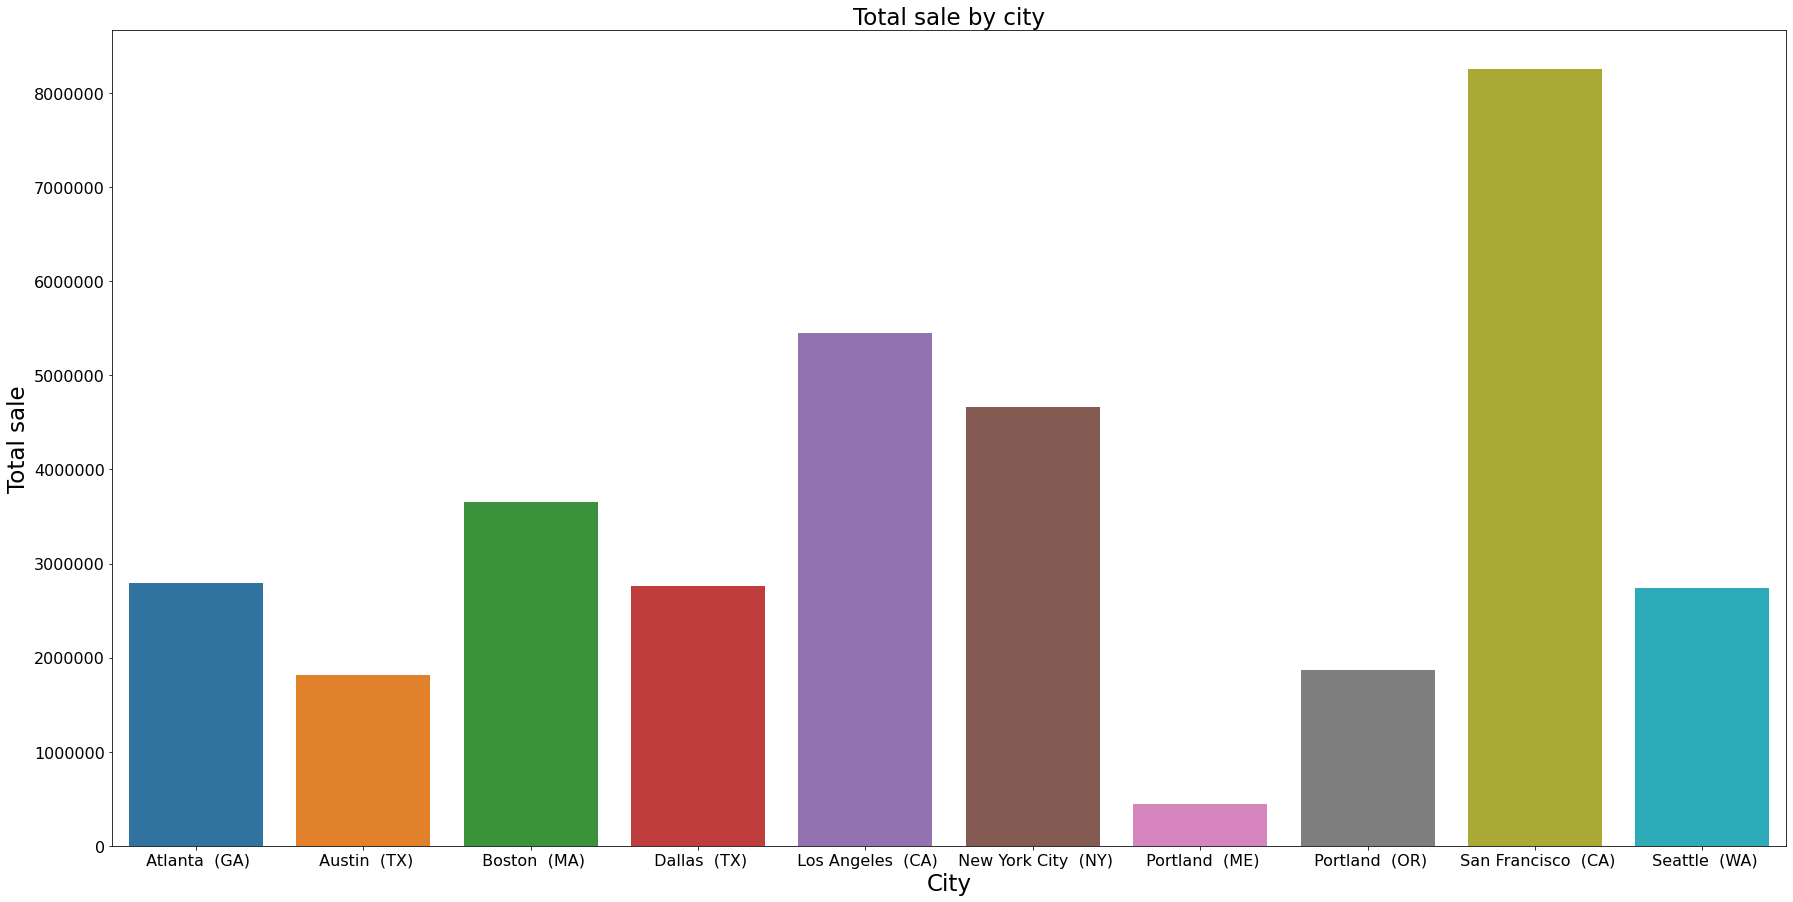

In [11]:
figure(figsize=(30, 15))
plt.title('Total sale by city',fontsize = 23)
plt.xlabel('City',fontsize = 23)
plt.ylabel('Total sale', fontsize = 23)
plt.tick_params(axis='both', which='major', labelsize=16)
sns.barplot(x = 'City', y = 'Total sale', data = best_city_sale)
plt.ticklabel_format(style='plain', axis='y')

## Question 3 : What time should we display advertisements to maximize likelihood of customer 's buying products?

In [12]:
df['Hour'] = df['Order Date'].dt.hour

In [13]:
best_hour_sale = df.groupby('Hour').sum()['Total sale'].reset_index()

best_hour_sale

,Hour,Total sale
0,0,713548.66
1,1,460563.90
2,2,234839.45
3,3,145742.94
4,4,162546.07
5,5,230664.87
6,6,447963.01
7,7,744067.32
8,8,1192309.20
9,9,1638784.04


<AxesSubplot:title={'center':'Total sale by hourly'}, xlabel='City', ylabel='Total sale'>

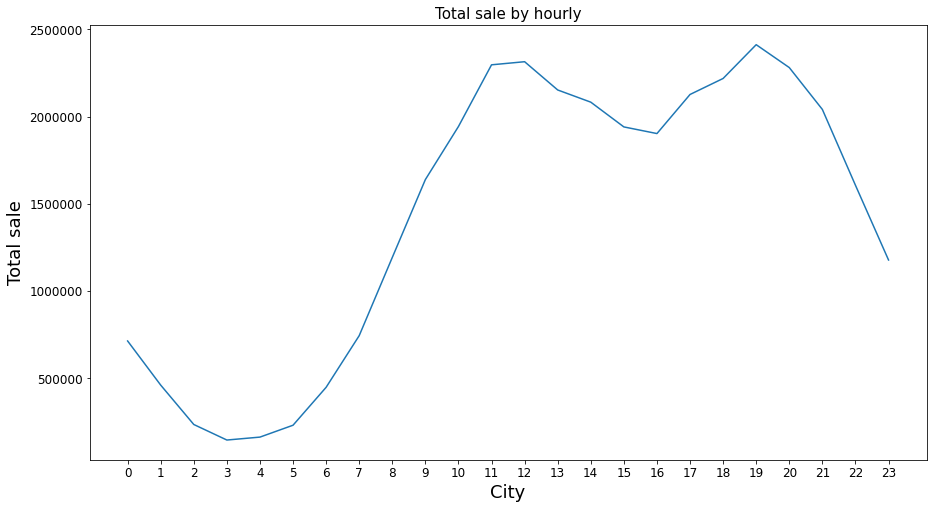

In [14]:
figure(figsize=(15, 8))
plt.title('Total sale by hourly', fontsize = 15)
plt.xlabel('City',fontsize = 18)
plt.ylabel('Total sale', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(best_hour_sale['Hour'])
sns.lineplot(x = 'Hour', y = 'Total sale', data = best_hour_sale)

## Question 4 : What products most often sold together ?

In [15]:
df.duplicated().sum()

0

In [19]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [20]:
from itertools import combinations
from collections import Counter

In [21]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


## Question 5: Which product sold the most ? Why do you think it sold the most ?

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sale,City,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA),22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,Wired Headphones


In [30]:
df3 = df.groupby('Product').sum()['Total sale'].reset_index().sort_values(by = 'Total sale', ascending = False)

df3

,Product,Total sale
13,Macbook Pro Laptop,8032500.00
18,iPhone,4792900.00
14,ThinkPad Laptop,4127958.72
9,Google Phone,3317400.00
1,27in 4K Gaming Monitor,2433147.61
3,34in Ultrawide Monitor,2352898.08
6,Apple Airpods Headphones,2345550.00
8,Flatscreen TV,1443900.00
7,Bose SoundSport Headphones,1342865.70
2,27in FHD Monitor,1131074.59


Macbook Pro Laptop has the highest total sale but it could be due to its high pricing so it is fair to count which product sold the most by quantity ordered.

In [31]:
df4 = df.groupby('Product').sum()['Quantity Ordered'].reset_index().sort_values(by = 'Quantity Ordered', ascending =False)

df4

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


The top 4 highest quantity ordered are batteries and charging cables. This could be due to customers want to bulk purchasing these products so they can store those for future usage and also it could be the customers in the areas use a lot of electronic devices so it makes sense to buy batteries and cable to power their devices.